DE ML Model

 window = 100
 epoch = 20
 batch = 100
 dropout = .02

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import alpaca_trade_api as tradeapi
from pathlib import Path
import requests

%matplotlib inline

In [2]:
!pwd

/Users/josephbarry/Desktop/FinTech_Class/Project_2/supreme-broccoli/notebooks/JB_scratchwork/Final_Models/ML_Stock_Predictions


In [3]:
csvpath = Path("DE_nasdaqdata.csv")

de_df = pd.read_csv(csvpath, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [4]:
de_df.head()

,Close/Last,Volume,Open,High,Low
Date,,,,,
2021-07-06,$349.45,1924037,$352.50,$353.00,$344.26
2021-07-02,$352.50,1132353,$354.57,$355.91,$351.21
2021-07-01,$354.29,1467982,$355.66,$356.19,$351.92
2021-06-30,$352.71,1643594,$348.17,$353.39,$348.17
2021-06-29,$348.93,1213477,$350.80,$352.70,$348.09


In [5]:
de_df.sort_index(ascending=True, inplace=True)

In [6]:
de_df = de_df.rename(columns={"Close/Last": "Close"})

In [7]:
de_df = de_df[['Close']]
de_df

,Close
Date,
2011-07-06,$84.59
2011-07-07,$86.44
2011-07-08,$86.11
2011-07-11,$83.49
2011-07-12,$81.65
...,...
2021-06-29,$348.93
2021-06-30,$352.71
2021-07-01,$354.29


In [8]:
de_df['Close'] = de_df['Close'].str.replace('$', '').astype(float)

<ipython-input-8-aa40f58bac61>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  de_df['Close'] = de_df['Close'].str.replace('$', '').astype(float)


In [9]:
de_df

,Close
Date,
2011-07-06,84.59
2011-07-07,86.44
2011-07-08,86.11
2011-07-11,83.49
2011-07-12,81.65
...,...
2021-06-29,348.93
2021-06-30,352.71
2021-07-01,354.29


In [10]:
def window_data(df, window, feature_col_number, target_col_number):
    X = []
    y = []
    for i in range(len(df) - window- 1):
        features = df.iloc[i : (i + window), feature_col_number]
        target = df.iloc[(i + window), target_col_number]
        X.append(features)
        y.append(target)
    return np.array(X), np.array(y).reshape(-1, 1)

In [11]:
window_size = 100
feature_column = 0 # why 0?
target_column = 0 # Why 0?

X, y = window_data(de_df, window_size, feature_column, target_column)

print (f"X sample values:\n{X[:3]} \n")
print (f"y sample values:\n{y[:3]}")

X sample values:
[[84.59 86.44 86.11 83.49 81.65 81.89 81.43 81.69 79.8  80.88 80.48 82.3
  81.24 81.89 80.9  79.42 79.39 78.51 78.72 76.82 77.07 72.41 72.66 67.05
  70.93 67.99 73.48 74.97 76.5  75.16 74.26 70.15 69.01 70.   72.66 75.1
  73.06 76.03 78.91 80.11 80.82 79.89 78.03 77.14 79.35 77.26 75.26 75.04
  76.56 77.29 78.64 78.02 77.19 75.98 72.82 68.59 67.47 68.44 69.48 67.42
  68.04 64.57 61.72 63.48 66.16 66.57 65.7  69.38 71.68 71.05 69.8  71.39
  69.57 70.13 69.11 69.25 72.23 74.55 73.12 73.93 77.74 78.67 75.9  73.7
  74.07 75.73 75.39 75.15 75.63 72.78 73.58 75.79 74.7  76.33 76.43 75.02
  74.27 72.68 71.92 74.72]
 [86.44 86.11 83.49 81.65 81.89 81.43 81.69 79.8  80.88 80.48 82.3  81.24
  81.89 80.9  79.42 79.39 78.51 78.72 76.82 77.07 72.41 72.66 67.05 70.93
  67.99 73.48 74.97 76.5  75.16 74.26 70.15 69.01 70.   72.66 75.1  73.06
  76.03 78.91 80.11 80.82 79.89 78.03 77.14 79.35 77.26 75.26 75.04 76.56
  77.29 78.64 78.02 77.19 75.98 72.82 68.59 67.47 68.44 69.48 67.42 68.

In [12]:
split = int(0.6 * len(X))

X_train = X[: split]
X_test = X[split:]

y_train = y[: split]
y_test = y[split:]

In [13]:
# Importing the MinMaxScaler from sklearn
from sklearn.preprocessing import MinMaxScaler

x_train_scaler = MinMaxScaler()
#x_test_scaler = MinMaxScaler()
y_train_scaler = MinMaxScaler()
#y_test_scaler = MinMaxScaler()

# Fit the scaler for the training Data
x_train_scaler.fit(X_train)
y_train_scaler.fit(y_train)

# Scale the training data
X_train = x_train_scaler.transform(X_train)
y_train = y_train_scaler.transform(y_train)

# Fit the scaler for the testing Data
#x_test_scaler.fit(X_test)
#y_test_scaler.fit(y_test)

# Scale the y_test data
X_test = x_train_scaler.transform(X_test)
y_test = y_train_scaler.transform(y_test)

In [14]:
# Reshape the features data
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

In [15]:
# Importing required Keras modules
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [16]:
# Define the LSTM RNN model.
model = Sequential()

# Initial model setup
number_units = window_size
# 20% of neurons to be dropped out
dropout_fraction = 0.2

# Layer 1
model.add(LSTM(
    units=number_units,
    return_sequences=True,
    input_shape=(X_train.shape[1], 1))
    )
model.add(Dropout(dropout_fraction))

# Layer 2
model.add(LSTM(units=number_units, return_sequences=True))
model.add(Dropout(dropout_fraction))

# Layer 3
model.add(LSTM(units=number_units))
model.add(Dropout(dropout_fraction))

# Output layer
model.add(Dense(1))

In [17]:
model.compile(optimizer="adam", loss="mean_squared_error")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 100)          40800     
_________________________________________________________________
dropout (Dropout)            (None, 100, 100)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100, 100)          80400     
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 100)          0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 100)               80400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 1

In [18]:
model.fit(X_train, y_train, epochs=20, shuffle=False, batch_size=100, verbose=1)

Epoch 1/20
15/15 [==============================] - 2s 91ms/step - loss: 0.0143
Epoch 2/20
15/15 [==============================] - 1s 85ms/step - loss: 0.0330
Epoch 3/20
15/15 [==============================] - 1s 78ms/step - loss: 0.0131
Epoch 4/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0073
Epoch 5/20
15/15 [==============================] - 1s 79ms/step - loss: 0.0079
Epoch 6/20
15/15 [==============================] - 1s 98ms/step - loss: 0.0042
Epoch 7/20
15/15 [==============================] - 1s 87ms/step - loss: 0.0103
Epoch 8/20
15/15 [==============================] - 1s 78ms/step - loss: 0.0039
Epoch 9/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0121
Epoch 10/20
15/15 [==============================] - 1s 76ms/step - loss: 0.0093
Epoch 11/20
15/15 [==============================] - 1s 80ms/step - loss: 0.0022
Epoch 12/20
15/15 [==============================] - 1s 82ms/step - loss: 0.0028
Epoch 13/20
15/15 [==================

In [19]:
model.evaluate(X_test, y_test, verbose=0)

0.452831894159317

In [20]:
predicted = model.predict(X_test)

In [21]:
predicted_prices = y_train_scaler.inverse_transform(predicted)

In [22]:
real_prices = y_train_scaler.inverse_transform(y_test.reshape(-1,1))

In [23]:
de_actual_predicted = pd.DataFrame({
    "Actual": real_prices.ravel(),
    "Predicted": predicted_prices.ravel()
}, index = de_df.index[-len(real_prices): ]) 

# Show the DataFrame's head
de_actual_predicted.head()

,Actual,Predicted
Date,,
2017-08-31,115.49,119.112625
2017-09-01,115.93,118.179077
2017-09-05,116.14,117.421127
2017-09-06,115.53,116.839241
2017-09-07,116.22,116.396217


In [24]:
de_actual_predicted.tail()

,Actual,Predicted
Date,,
2021-06-29,349.89,240.620346
2021-06-30,348.93,240.813248
2021-07-01,352.71,241.009186
2021-07-02,354.29,241.235504
2021-07-06,352.50,241.479446


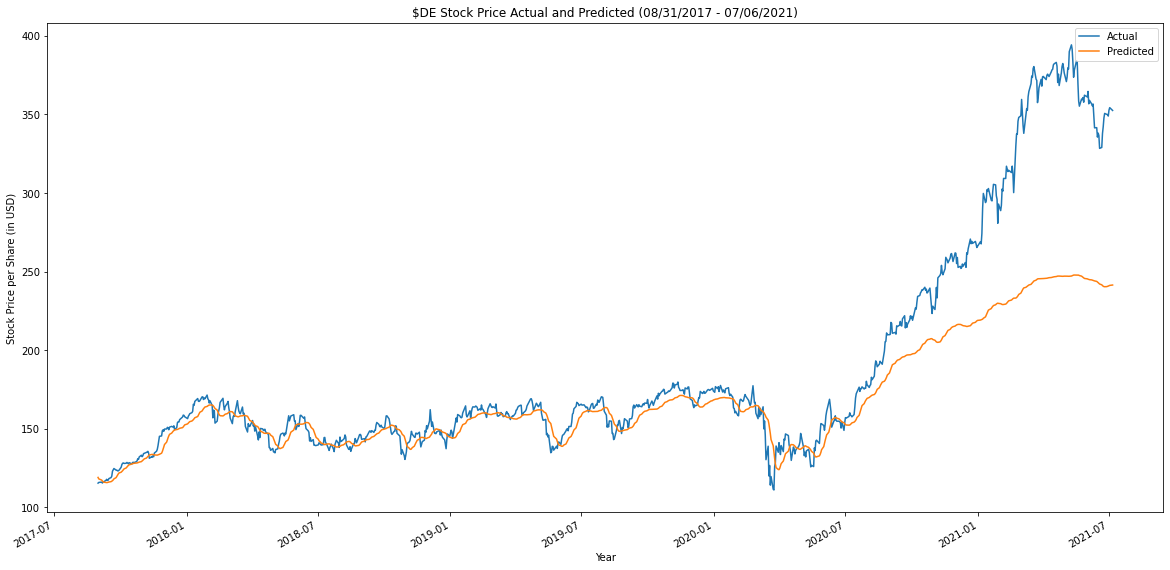

In [26]:
de_actual_predicted.plot(figsize=(20,10))
plt.title('$DE Stock Price Actual and Predicted (08/31/2017 - 07/06/2021)')
plt.xlabel('Year')
plt.ylabel('Stock Price per Share (in USD)')
plt.legend(loc="best")
plt.show()